In [1]:
print('hello world')

hello world


# Convolution Neural Neetwork 
A simple CNN looks like this:

    Input Layer – image data (e.g., 28x28 MNIST digits)

    Convolution Layer – filters/kernels that scan over the image

    Activation Function – usually ReLU

    Pooling Layer – downsampling, typically Max Pooling

    Flatten – convert 2D data to 1D

    Fully Connected Layer – classic dense layers

    Softmax Output – for classification

In [2]:
from tensorflow.keras.datasets import mnist
(X_train ,y_train ), (X_test  , y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
print(X_train.shape)
print(y_train.shape)    
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


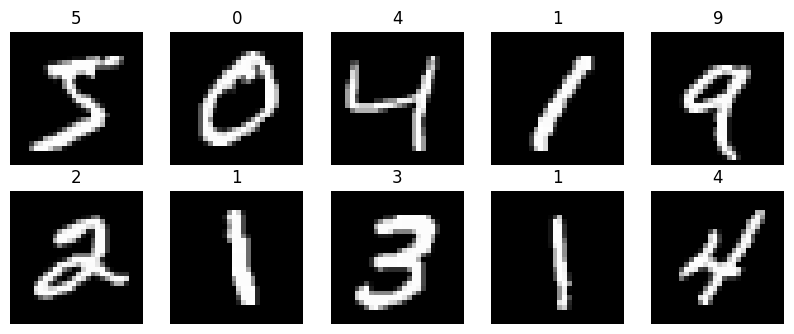

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.gray()
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical




In [ ]:
#reshape the data 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #(batch_size, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#one hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [12]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9164 - loss: 0.2853 - val_accuracy: 0.9856 - val_loss: 0.0450
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9851 - loss: 0.0470 - val_accuracy: 0.9860 - val_loss: 0.0399
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9869 - val_loss: 0.0396
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9938 - loss: 0.0204 - val_accuracy: 0.9888 - val_loss: 0.0344
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9958 - loss: 0.0141 - val_accuracy: 0.9909 - val_loss: 0.0274
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9907 - val_loss: 0.0351
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 0.9908 - val_loss: 0.0329
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9975 - loss: 0

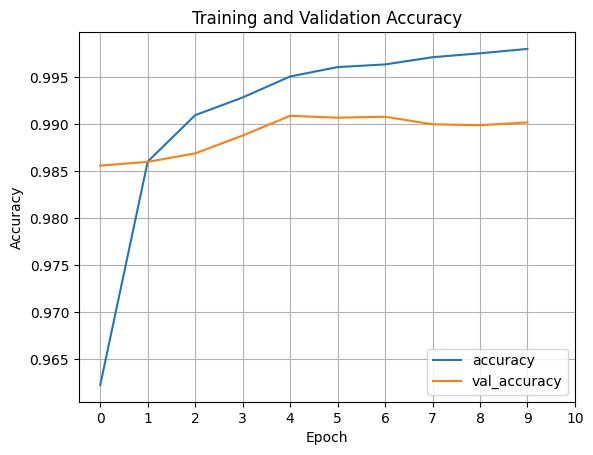

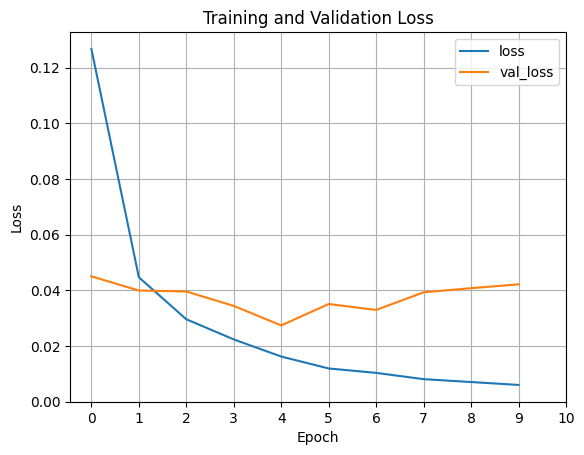

In [20]:
#accuracy plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.xticks(np.arange(0, 11, 1))
plt.show()

#loss plot
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xticks(np.arange(0, 11, 1))
plt.grid()
plt.show()


In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9883 - loss: 0.0497
Test accuracy: 0.9901999831199646


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


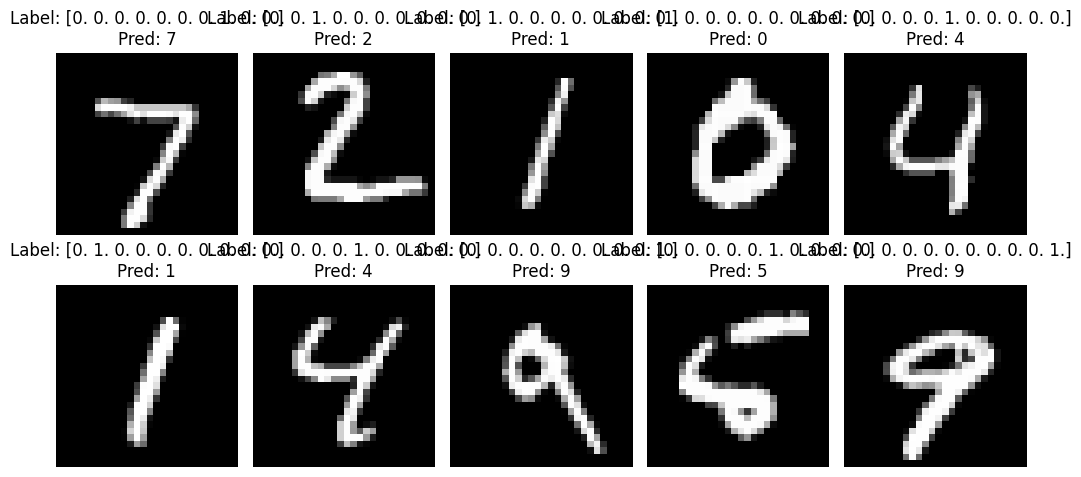

In [29]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [34]:
sample = X_train[0]
y = y_train[0]

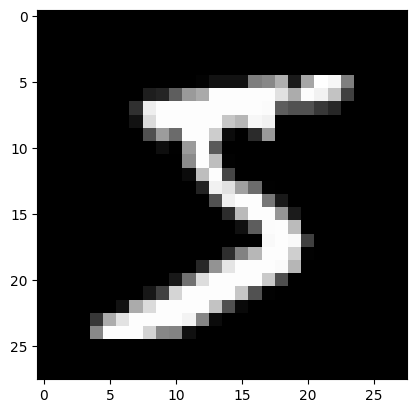

In [40]:
sapmple_reshpe = sample.reshape(1,28,28,1)
sample.shape , sapmple_reshpe.shape
plt.imshow(sample , cmap='gray')

In [38]:
res = model.predict(sapmple_reshpe)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [44]:
int(np.argmax(res))

5

In [42]:
model.save('mnsit_cnn.keras')